2024-03-18 19:46:18.916324: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-18 19:46:18.941837: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 19:46:19.321981: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


airplanes


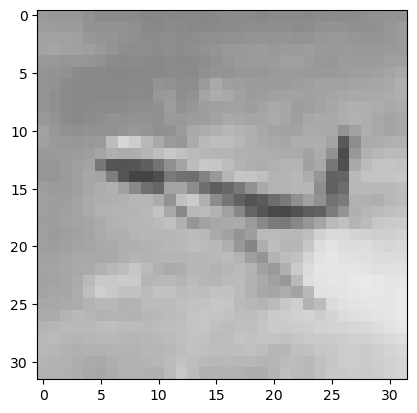

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers

import matplotlib.pyplot as plt
(X_train,Y_train),(X_test,Y_test)=keras.datasets.cifar10.load_data()

class_names = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']

i=15000
Y_train=Y_train.reshape(-1,)
Y_test=Y_test.reshape(-1,)
plt.imshow(X_train[i])
print(class_names[Y_train[i]])


X_train=X_train/255
X_test=X_test/255
    

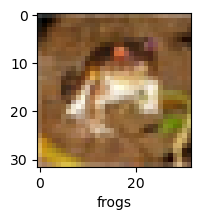

In [2]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(class_names[Y[index]])


plot_sample(X_train, Y_train, 0)




In [3]:
model=keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(X_train.shape)
model.fit(X_train,Y_train,epochs=5)

/home/sirjanhansda/miniconda3/envs/newEden/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-03-18 19:46:29.801377: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4122 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


(50000, 32, 32, 3)
Epoch 1/5


I0000 00:00:1710771390.662230   18860 service.cc:145] XLA service 0x7623d80051f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1710771390.662253   18860 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2024-03-18 19:46:30.668985: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-18 19:46:30.700601: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  88/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1650 - loss: 2.2463

I0000 00:00:1710771391.220450   18860 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3014 - loss: 1.9366
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4179 - loss: 1.6480
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4524 - loss: 1.5470
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4743 - loss: 1.4960
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4954 - loss: 1.4374


In [4]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4652 - loss: 1.5238


[1.5275945663452148, 0.4620000123977661]

In [5]:
cnn=keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(units=64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/home/sirjanhansda/miniconda3/envs/newEden/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
cnn.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']    
)

In [7]:
cnn.fit(X_train,Y_train,epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2036 - loss: 2.1488
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3940 - loss: 1.6860
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4682 - loss: 1.4746
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5106 - loss: 1.3636
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5475 - loss: 1.2794
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5728 - loss: 1.2089
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5943 - loss: 1.1480
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6177 - loss: 1.0889
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6338 - loss: 1.0349
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6559 - loss: 0.9892
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6660 - loss: 0.9510
Epoch 12/20
1563/1563 ━━━━━━━━

In [8]:
Y_pred=cnn.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [9]:
y_classes=[np.argmax(element) for element in Y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [10]:
correct=0
for i in range(len(y_classes)):
    if(y_classes[i]==Y_test[i]):
        correct+=1

print(f"Total={len(y_classes)}, corect={correct}")

Total=10000, corect=6668


In [11]:
(X_tr2,Y_tr1),(X_ts1,Y_ts1)=tf.keras.datasets.mnist.load_data()

ann2=keras.Sequential([

    layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',input_shape=(28,28,1),strides=1),
    layers.AveragePooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(units=128,activation='relu'),
    layers.Dense(units=64,activation='relu'),
    layers.Dense(units=10,activation='softmax')
])

ann2.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  
)

In [12]:
ann2.fit(X_tr2,Y_tr1,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 718us/step - accuracy: 0.8625 - loss: 1.1767
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - accuracy: 0.9786 - loss: 0.0675
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - accuracy: 0.9889 - loss: 0.0369
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.9914 - loss: 0.0271
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.9947 - loss: 0.0168
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.9966 - loss: 0.0110
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.9966 - loss: 0.0101
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.9972 - loss: 0.0080
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.9974 - loss: 0.0068
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.9983 - loss: 0.0054


In [13]:
y_pred=ann2.predict(X_ts1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [14]:
y_pred.shape
y_classes=[np.argmax(item) for item in y_pred]

corr=0
for i in range(len(y_classes)):
    if(y_classes[i]==Y_ts1[i]):
        corr+=1

print(f"Full={len(y_classes)}, true={corr}")

Full=10000, true=9825


In [1]:

import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

NameError: name 'tf' is not defined